Cette première session de NLP va vous donner les bases de la manipulation de texte en vue du data challenge qui vous attend après l'été !

In [ ]:
!pip install spacy
!python -m spacy download fr_core_news_md
!python -m spacy download fr

In [1]:
import spacy

# Preprocessing avec spacy

## Chargement de la librairie

- Importer la classe `French` de `spacy.lang.fr`
- Créer l'objet `nlp` avec le constructeur de la classe `French`
- Créer un `doc` et afficher son texte.

In [2]:
# Importez la classe de langage French
from spacy.lang.____ import ____

# Créez l'objet nlp
nlp = ____

# Traitement du texte
doc = nlp("Ceci est une phrase narcissique puisqu'elle "
          "ne parle que d'elle-même.")

# Affichez le texte du document
print(____.text)

Ceci est une phrase narcissique puisqu'elle ne parle que d'elle-même.


**L'objet NLP**

- contient le 'pipeline' des calculs
- inclut des règles spécifiques au langage pour la tokenization, etc.

**L'objet doc**

Contient un document, c'est-à-dire un ensemble de *tokens*.

### Manipulation d'un objet `Doc`

L'objet `Doc`se manipule comme une liste. 

A l'aide des `[]`:
- Accedez au premier token de doc
- Selectionnez les mots `'est une'` dans une slice
- Selectionnez les mots entre `'est une phrase narcissique'` dans une slice

In [3]:
# A slice of the Doc for 'est une'
est_une = ____
print(est_une.text)

# A slice of the Doc for 'est une phrase narcissique'
est_une_phrase_narcissique = ____
print(est_une_phrase_narcissique.text)

est une
est une phrase narcissique


### Tokenisation

In [ ]:
from spacy.lang.fr import French

# Charger English tokenizer, tagger, parser, NER and word vectors
nlp = French()

text = """L'apprentissage de la data science requiert de ne pas se décourager.
Les défis et les revers ne sont pas des échecs, ils font simplement partie du voyage!"""

# L'objet "nlp" est utilisé pour créer un document avec des annotations linguistiques
doc = nlp(text)

In [4]:
# Tokenization de mots

# Créer la liste des tokens de mots
token_list = []
for token in my_doc:
    token_list.append(token.text)
print(token_list)

["L'", 'apprentissage', 'de', 'la', 'data', 'science', 'requiert', 'de', 'ne', 'pas', 'se', 'décourager', '.', '\n', 'Les', 'défis', 'et', 'les', 'revers', 'ne', 'sont', 'pas', 'des', 'échecs', ',', 'ils', 'font', 'simplement', 'partie', 'du', 'voyage', '!']


In [5]:
# Tokenization de phrases

# Créer le composant 'sentencizer' ('sentence boundary detection') du pipeline
sbd = nlp.create_pipe('sentencizer')

# Ajouter le composant au pipeline
nlp.add_pipe(sbd)

# Créaer une liste de tokens de phrases
sents_list = []
for sent in doc.sents:
    sents_list.append(sent.text)
print(sents_list)

["L'apprentissage de la data science requiert de ne pas se décourager.", '\nLes défis et les revers ne sont pas des échecs, ils font simplement partie du voyage!']


#### Exercice

Dans cet exemple, vous allez utiliser les objets `Doc` et `Token` de spaCy, et des attributs lexicaux pour identifier des pourcentages dans un texte. Vous devez chercher deux tokens qui se suivent: un nombre et un signe pourcentage.

- Utiliser l'attribut de token `like_num` pour voir si le token dans le document ressemble à un nombre.
- Lire le token qui suit immédiatement ce token. L'index du token suivant dans le `doc` est `token.i + 1`.
- Regarder si l'attribut `text` du token suivant est un signe `”%“`.

In [4]:
# Process the text
doc = nlp(
    "En 1990, plus de 60% de la population d'Asie orientale vivait dans l'extrême pauvreté. "
    "Cela représente désormais moins de 4%."
)

# Iterate over the tokens in the doc
for token in doc:
    # Check if the token resembles a number
    if ____.____:
        # Get the next token in the document
        next_token = ____[____]
        # Check if the next token's text equals "%"
        if next_token.____ == "%":
            print("Pourcentage trouvé:", token.text)

Pourcentage trouvé: 60
Pourcentage trouvé: 4


### Suppression des stop words

In [7]:
from spacy.lang.fr.stop_words import STOP_WORDS

# print(list(STOP_WORDS)[:10])

In [8]:
#Implémentation des stop words:
filtered_sent=[]

#  L'objet "nlp" est utilisé pour créer des documents avec annotations
doc = nlp(text)

# filtering stop words
for word in doc:
    if word.is_stop or word.is_punct ==False:
        filtered_sent.append(word)
print("Filtered Sentence:",filtered_sent)

Filtered Sentence: [L', apprentissage, de, la, data, science, requiert, de, ne, pas, se, décourager, 
, Les, défis, et, les, revers, ne, sont, pas, des, échecs, ils, font, simplement, partie, du, voyage]


In [9]:
doc = nlp(text)
tokens = [token for token in doc if not token.text in STOP_WORDS and not token.is_punct]
print(tokens)

[L', apprentissage, data, science, requiert, décourager, 
, Les, défis, revers, échecs, simplement, partie, voyage]


### Lemmatisation

In [40]:
# Implémenter la lemmatization en anglais
nlp = spacy.load('en_core_web_sm')

doc = nlp("Electric and magnetic fields are similar. Mathematic fields and potato fields aren't.")

for word in doc:
    print(word, word.lemma_)

Electric electric
and and
magnetic magnetic
fields field
are be
similar similar
. .
Mathematic mathematic
fields field
and and
potato potato
fields field
are be
n't not
. .


In [ ]:
!pip install spacy-lefff

In [44]:
# Implémenter la lemmatization en français

import spacy
from spacy_lefff import LefffLemmatizer, POSTagger

nlp = French()

pos = POSTagger()
french_lemmatizer = LefffLemmatizer(after_melt = True, default = True)
nlp.add_pipe(pos, name='pos')
nlp.add_pipe(french_lemmatizer, name='lefff', after='pos')

doc = nlp("Enedis entretient plus d'1,34 million de kilomètres de câbles électriques.")

# L'attribut 'lemme' de spacy-lefff est '_.lefff_lemma'
for word in doc:
    print(word.text, word._.lefff_lemma)

2020-07-01 09:58:03,557 - spacy_lefff.downloader - INFO - data already set up
2020-07-01 09:58:03,558 - spacy_lefff.melt_tagger - INFO - Token melt_tagger already registered
2020-07-01 09:58:03,558 - spacy_lefff.melt_tagger - INFO -   TAGGER: Loading lexicon...
2020-07-01 09:58:03,979 - spacy_lefff.melt_tagger - INFO -   TAGGER: Loading tags...
2020-07-01 09:58:04,008 - spacy_lefff.melt_tagger - INFO -   TAGGER: Loading model from C:\Users\Datalyo-38\Anaconda3\lib\site-packages\spacy_lefff\data\tagger\models/fr...
2020-07-01 09:58:04,478 - spacy_lefff.melt_tagger - INFO -   TAGGER: Loading model from C:\Users\Datalyo-38\Anaconda3\lib\site-packages\spacy_lefff\data\tagger\models/fr: done
2020-07-01 09:58:04,564 - spacy_lefff.lefff - INFO - New LefffLemmatizer instantiated.
2020-07-01 09:58:04,565 - spacy_lefff.lefff - INFO - Token lefff_lemma already registered
2020-07-01 09:58:04,566 - spacy_lefff.lefff - INFO - Reading lefff data...
2020-07-01 09:58:05,030 - spacy_lefff.lefff - INFO -

### Etiquetage morpho-syntaxique (POS tags)

**Que sont les modèles statistiques ?**

- Ils permettent à spaCy de prédir les attributs linguistiques dans un contexte
    - Tags Part-of-speech (POS)
    - Dépendances syntaxiques
    - Entités nommées
- Ils sont entraînés sur des textes labellisés
- Ils peuvent être mis à jour avec des exemples additionnels

In [42]:
from spacy import displacy
import fr_core_news_md

nlp = fr_core_news_md.load()

In [14]:
doc = nlp("Elle a mangé la pizza")

for token in doc:
    # Afficher le texte et les 'part-of-speech' tags
    print(token.text, token.pos_)

Elle PRON
a AUX
mangé VERB
la DET
pizza NOUN


In [47]:
spacy.explain("PRON")

'pronoun'

In [15]:
for token in doc:
    print(token.text, token.pos_, token.dep_, token.head.text)

displacy.render(doc, style="dep")

Elle PRON nsubj mangé
a AUX aux mangé
mangé VERB ROOT mangé
la DET det pizza
pizza NOUN obj mangé


In [48]:
spacy.explain("nsubj")

'nominal subject'

In [74]:
# Choisir une phrase et demander à spaCy d'afficher les POS tags et les relations entre les mots

doc = nlp("_____")

for token in doc:
    print(______________)

# Tester les styles 'dep' et 'ent'
displacy.render(doc, style=___)

En ADP case
France PROPN obl
les DET det
compteurs NOUN nsubj:pass
intelligents ADJ amod
seront AUX aux:pass
bientôt ADV advmod
entièrement ADV advmod
déployés VERB ROOT
. PUNCT punct


In [75]:
# Choisir une phrase et demander à spaCy d'afficher les POS tags et les relations entre les mots

doc = nlp("_____")

for token in doc:
    print(______________)

# Changer la couleur en bleu et demander à spaCy d'afficher les groupes nominaux comme un même ensemble
displacy.render(doc, style="dep", options = {"color": "___", "collapse_phrases" : ___})

En ADP case
France PROPN obl
les DET det
compteurs NOUN nsubj:pass
intelligents ADJ amod
seront AUX aux:pass
bientôt ADV advmod
entièrement ADV advmod
déployés VERB ROOT
. PUNCT punct


### Détection d'entités

In [53]:
doc = nlp("Enedis cherche de nouveaux bureaux à Vaison-La-Romaine "
          "avec l'aide de François Cordel.")

for ent in doc.ents:
    # Afficher le label de l'entité
    print(ent.text, ent.label_)

displacy.render(doc, style="ent")

Enedis LOC
Vaison LOC
Romaine LOC
François Cordel PER


In [17]:
spacy.explain("ORG")

'Companies, agencies, institutions, etc.'

In [18]:
spacy.explain("LOC")

'Non-GPE locations, mountain ranges, bodies of water'

In [19]:
spacy.explain("PER")

'Named person or family.'

### Chunking : noun chunks

In [20]:
doc = nlp("Il est important pour les utilisateurs de véhicules électriques de disposer facilement "
          "d'infrastructures de recharge pratiques.")

for chunk in doc.noun_chunks:
    print("Groupe nominal :", chunk.text, "; Nom : ", chunk.root.text, "\n")

Groupe nominal : Il ; Nom :  Il 

Groupe nominal : de véhicules électriques ; Nom :  véhicules 

Groupe nominal : d'infrastructures de recharge pratiques ; Nom :  infrastructures 



# Nuage de mots

Nous allons scrapper la page wikipedia d'Enedis et créer un nuage de mots pour comprendre ce qu'il ressort de l'article. 

- Utilisez le code suivant pour charger la page

In [21]:
import requests
from bs4 import BeautifulSoup
r = requests.get("https://fr.wikipedia.org/wiki/Enedis")
html_doc = r.text
soup = BeautifulSoup(html_doc, 'html.parser')

corpus = []
for p in soup.find_all("p"):
    corpus.append(p.text)

join_corpus = " ".join(corpus)
clean_corpus = join_corpus.strip().encode("utf-8").decode("utf-8")
clean_corpus[:70]+"..."

'Enedis, anciennement ERDF (pour Électricité Réseau Distribution France...'

* Importez maintenant `fr_core_news_sm` --> [Documentation](https://spacy.io/models)

In [22]:
# Import de Spacy et initialisation à Francais


* Incorporez maintenant votre corpus complet dans spacy via `fr_core_news_sm.load()`

In [23]:
# Création d'une variable doc contenant les textes du corpus


- Installez la librairie wordcloud

In [ ]:
!pip install wordcloud

* Avec la librairie `wordcloud`, créez un premier nuage de mots 

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wd = WordCloud()
cloud = wd.generate(doc.text)
plt.imshow(cloud)

* Importez maintenant les stop-words présents dans `spacy`

In [25]:
# Import des Stop words
from spacy.lang.fr.stop_words import STOP_WORDS

* Faites à nouveau un nuage de mots sans les stop words

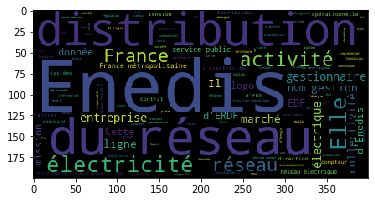

In [26]:
wd = WordCloud(stopwords=____)
cloud = wd.generate(doc.text)
plt.imshow(cloud)

* Enfin nous aurions besoin d'avoir un corpus de mots lemmatisés, recréez un corpus de mots lemmatisés et visualisez votre nouveau nuage de mots

In [28]:
lemma = [token.___ for token in doc if token.___ not in STOP_WORDS]

In [29]:
corpus_lemma = " ".join(lemma)

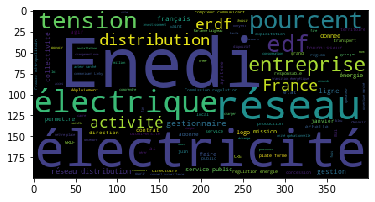

In [30]:
wd = WordCloud()
cloud = wd.generate(corpus_lemma)
plt.imshow(cloud)

# Classification de texte

Dans cette partie, nous allons prendre un peu d'avance sur les formations python et utiliser les librairies `pandas` et `scikit learn` pour faire un exemple simple de classification de texte. Nous utiliserons un jeu de données de commentaires de restaurants en français, l'objectif sera de déterminer si le commentaire est négatif ou positif. 

## Preprocessing

- Importer la librairie `pandas` sous l'allias `pd`
- Utiliser la fonction `pd.read_csv()` pour charger le fichier `restaurant.csv` dans un dataframe `df` (on pourra utiliser l'option `index_col=0` pour indiquer que la première colonne du csv est l'index)
- Afficher les premières  lignes du dataframe en utilisant la fonction `<dataframe>.head()`

In [13]:
import pandas as pd

df = pd.read_csv('restaurants.csv', index_col=0)
df.head()

,texte,label_2,label_3
0,"Un service passable .. Des plats surcuits, des...",0,0
1,"Nous avons bien aimé l'ambiance, sur la promen...",1,2
2,"on s'attendait à mieux (attente, qualité moyen...",0,0
3,Une adresse à garder pour soi vue imprenable s...,1,2
4,Une petite dame nous accueille sans le sourire...,0,0


Notre dataframe contient 3 colonnes : 
- `texte` : le texte du commentaire 
- `label_2` : le label du commentaire : 0 si négatif, 1 si positif
- `label_3` : idem : 0 si négatif, 1 si neutre, 2 si positif

Pour l'exemple de classification, nous n'utiliserons que les colonnes `texte` et `label_2`.

- Comme vu dans la partie précédente, importez le parser `French` en utilisant la fonction `load('fr_core_news_md')`
- Ajoutez le lemmatiseur français au parser en utilisant `add_pipe`
- Créez un exemple de document tokenisé `doc` en appliquant le parser sur le premier texte `df.texte[0]`
- Affichez l'exemple `doc`

In [133]:
from spacy_lefff import LefffLemmatizer

nlp = spacy.load('fr_core_news_md')
french_lemmatizer = LefffLemmatizer(default=True)
nlp.add_pipe(french_lemmatizer, name='lefff')

doc = nlp(df.texte[0])
print(doc)

2020-07-01 10:38:23,365 - spacy_lefff.lefff - INFO - New LefffLemmatizer instantiated.
2020-07-01 10:38:23,365 - spacy_lefff.lefff - INFO - Token lefff_lemma already registered
2020-07-01 10:38:23,366 - spacy_lefff.lefff - INFO - Reading lefff data...
2020-07-01 10:38:23,806 - spacy_lefff.lefff - INFO - Successfully loaded lefff lemmatizer
2020-07-01 10:38:23,867 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
Un service passable .. Des plats surcuits, des sauces figées dans leur pot (on se demande si elles n'étaient pas sur d'autres tables avant de nous être servies) , le prix est correct mais le goût n'est pas au rendez vous ... très déçu par ce resto


- Comme vu dans la première partie, supprimez les stop words et la ponctuation en utilisant une list comprehension.
- Stockez le résultat dans une liste `mytokens`

In [172]:
mytokens = [token for token in doc if not token.is_stop and not token.is_punct]
print(mytokens)

[service, passable, plats, surcuits, sauces, figées, pot, demande, tables, servies, prix, correct, goût, rendez, déçu, resto]


- Appliquez à `mytokens`, dans une list comprehension :
    - La lemmatisation via lefff `_.lefff_lemma`
    - Le passage en minuscule en minuscule avec `.lower()`
    - La suppression des espaces avec `.strip()`
- Stockez le résultat dans la même variable `mytokens` et affichez la

In [173]:
mytokens = [word._.lefff_lemma.lower().strip() for word in mytokens ]
print(mytokens)

['service', 'passable', 'plat', 'surcuits', 'sauce', 'figer', 'pot', 'demander', 'table', 'servir', 'prix', 'correct', 'goût', 'rendez', 'décevoir', 'resto']


- Créer la function `spacy_tokenizer` qui contient 

In [174]:
# Création de la fonction de tokenization
def spacy_tokenizer(text):
    # Création du token, utilisé pour créer des documents avec des annotations linguistiques
    doc = nlp(text)
    
    # Suppression des stop words
    mytokens = [token for token in doc if not token.is_stop and not token.is_punct]
    
    # Lemmatisation de chaque token et conversion en caractères minuscules
    mytokens = [word._.lefff_lemma.lower().strip() for word in mytokens ]

    # On retourne la liste des tokens préparés
    return mytokens

## Vectorisation

In [176]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline

In [ ]:
blabla bag of words blablabla tfidf blablabla

In [156]:
# modifier max_features
# modifier ngram_range
bow_vector = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,1))

In [157]:
# modifier max_features
# modifier ngram_range
tfidf_vector = TfidfVectorizer(tokenizer = spacy_tokenizer)

blablabla données blablabla

In [158]:
X = df['texte'] # les données que l'on veut analyser
ylabels = df['label_2'] # les labels, ou réponses, pour lesquels on veut tester notre modèle

In [159]:
from sklearn.model_selection import train_test_split


In [160]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.3)

## Application du modèle

In [177]:
# Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

# Création du pipeline en utilisant des Bag of Words
pipe = Pipeline([
#     ('cleaner', predictors()),
    ('vectorizer', bow_vector),
    ('classifier', classifier)
])

# Génération du modèle
pipe.fit(X_train,y_train)

2020-07-01 10:53:19,402 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-07-01 10:53:19,435 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-07-01 10:53:19,469 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-07-01 10:53:19,495 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-07-01 10:53:19,534 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-07-01 10:53:19,566 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-07-01 10:53:19,597 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-07-01 10:53:19,641 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-07-01 10:53:19,672 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-07-01 10:53:19,709 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-07-01 10:53:19,744 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-07-01 10:53:19,816 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tag

2020-07-01 10:53:23,720 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-07-01 10:53:23,757 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-07-01 10:53:23,779 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-07-01 10:53:23,819 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-07-01 10:53:23,875 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-07-01 10:53:23,905 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-07-01 10:53:23,951 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-07-01 10:53:23,979 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-07-01 10:53:24,003 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-07-01 10:53:24,029 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-07-01 10:53:24,067 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-07-01 10:53:24,108 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tag

2020-07-01 10:53:27,382 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-07-01 10:53:27,421 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-07-01 10:53:27,472 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-07-01 10:53:27,521 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-07-01 10:53:27,557 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-07-01 10:53:27,615 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-07-01 10:53:27,754 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-07-01 10:53:27,793 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-07-01 10:53:27,839 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-07-01 10:53:27,865 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-07-01 10:53:27,889 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-07-01 10:53:27,920 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tag

C:\Users\Datalyo-38\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
         steps=[('vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function spacy_tokenizer at 0x0000022E2BC19288>,
                                 vocabulary=None)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
     

In [180]:
from sklearn import metrics
# Predicting avec un dataset de test
predicted = pipe.predict(X_test)

# Précision du modèle
print("Confusion matrix:\n",metrics.confusion_matrix(y_test, predicted))
print("\nLogistic Regression Accuracy:",metrics.accuracy_score(y_test, predicted))

2020-07-01 10:54:21,731 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-07-01 10:54:21,772 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-07-01 10:54:21,810 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-07-01 10:54:21,847 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-07-01 10:54:21,912 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-07-01 10:54:21,946 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-07-01 10:54:21,971 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-07-01 10:54:22,000 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-07-01 10:54:22,032 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-07-01 10:54:22,061 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-07-01 10:54:22,087 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-07-01 10:54:22,122 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tag

2020-07-01 10:54:25,908 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-07-01 10:54:25,939 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-07-01 10:54:25,980 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
Confusion matrix:
 [[48  9]
 [11 33]]

Logistic Regression Accuracy: 0.801980198019802


**Remarque**

La qualité des données initiales a un rôle fondamental.

*Exemple*
- `' '.join(sentences)` --> 75% accuracy
- `'. '.join(sentences)` --> 80% accuracy

## T-SNE sur TF-IDF

In [165]:
X = df['texte'] # les données que l'on veut analyser
ylabels = df['label_3'] # les labels, ou réponses, pour lesquels on veut tester notre modèle
print(df.loc[:, ['texte','label_3']])

                                                 texte  label_3
0    Un service passable .. Des plats surcuits, des...        0
1    Nous avons bien aimé l'ambiance, sur la promen...        2
2    on s'attendait à mieux (attente, qualité moyen...        0
3    Une adresse à garder pour soi vue imprenable s...        2
4    Une petite dame nous accueille sans le sourire...        0
..                                                 ...      ...
330  des problèmes digestifs aprés le repas!. j'ai ...        0
331  Alors là, si vous voulez un resto classe, une ...        2
332  Les amis voulaient manger des crêpes mais ... ...        2
333  Dés que nous sommes rentrés dans l’établissent...        0
334  la salle de restaurant fait cantine,la déco es...        0

[335 rows x 2 columns]


In [166]:
# On calcule le tf-idf pour chaque mot de chaque texte
tfidf = tfidf_vector.fit_transform(X)
print(tfidf[0])

2020-07-01 10:42:18,479 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-07-01 10:42:18,508 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-07-01 10:42:18,526 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-07-01 10:42:18,548 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-07-01 10:42:18,583 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-07-01 10:42:18,634 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-07-01 10:42:18,673 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-07-01 10:42:18,697 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-07-01 10:42:18,731 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-07-01 10:42:18,779 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-07-01 10:42:18,808 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-07-01 10:42:18,835 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tag

2020-07-01 10:42:22,394 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-07-01 10:42:22,463 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-07-01 10:42:22,496 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-07-01 10:42:22,528 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-07-01 10:42:22,561 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-07-01 10:42:22,586 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-07-01 10:42:22,619 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-07-01 10:42:22,665 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-07-01 10:42:22,691 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-07-01 10:42:22,720 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-07-01 10:42:22,746 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-07-01 10:42:22,777 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tag

2020-07-01 10:42:26,260 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-07-01 10:42:26,350 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-07-01 10:42:26,405 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-07-01 10:42:26,522 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-07-01 10:42:26,563 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-07-01 10:42:26,600 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-07-01 10:42:26,645 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-07-01 10:42:26,679 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-07-01 10:42:26,742 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-07-01 10:42:26,780 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-07-01 10:42:26,808 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-07-01 10:42:26,836 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tag

2020-07-01 10:42:31,181 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-07-01 10:42:31,215 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-07-01 10:42:31,234 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-07-01 10:42:31,253 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-07-01 10:42:31,287 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-07-01 10:42:31,320 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-07-01 10:42:31,366 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-07-01 10:42:31,412 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-07-01 10:42:31,450 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-07-01 10:42:31,499 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-07-01 10:42:31,526 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
2020-07-01 10:42:31,562 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tag

In [167]:
# Affichage des résultats pour le premier commentaire

# Premier commentaire
print(df.loc[0, 'texte'])

# TF-IDF pour le premier commentaire
df_tfidf = pd.DataFrame(tfidf[0].T.todense(), index = tfidf_vector.get_feature_names(), columns=["tf_idf"])
df_tfidf.sort_values(by=["tf_idf"],ascending=False)

Un service passable .. Des plats surcuits, des sauces figées dans leur pot (on se demande si elles n'étaient pas sur d'autres tables avant de nous être servies) , le prix est correct mais le goût n'est pas au rendez vous ... très déçu par ce resto


,tf_idf
surcuits,0.380684
figer,0.355479
rendez,0.337596
pot,0.323724
passable,0.323724
...,...
démarquer,0.000000
démonter,0.000000
départ,0.000000
dépasser,0.000000


In [168]:
# Création d'un dataframe regroupant les tf-idf et les labels
df_tfidf = pd.DataFrame(tfidf.todense(), columns = tfidf_vector.get_feature_names())
df_tfidf = pd.concat([df_tfidf, ylabels], axis=1)
print(df_tfidf)

       +  -en  -là  -plat   -t  .repas    0  0,50   00    1  ...  éviter!!!!.  \
0    0.0  0.0  0.0    0.0  0.0     0.0  0.0   0.0  0.0  0.0  ...          0.0   
1    0.0  0.0  0.0    0.0  0.0     0.0  0.0   0.0  0.0  0.0  ...          0.0   
2    0.0  0.0  0.0    0.0  0.0     0.0  0.0   0.0  0.0  0.0  ...          0.0   
3    0.0  0.0  0.0    0.0  0.0     0.0  0.0   0.0  0.0  0.0  ...          0.0   
4    0.0  0.0  0.0    0.0  0.0     0.0  0.0   0.0  0.0  0.0  ...          0.0   
..   ...  ...  ...    ...  ...     ...  ...   ...  ...  ...  ...          ...   
330  0.0  0.0  0.0    0.0  0.0     0.0  0.0   0.0  0.0  0.0  ...          0.0   
331  0.0  0.0  0.0    0.0  0.0     0.0  0.0   0.0  0.0  0.0  ...          0.0   
332  0.0  0.0  0.0    0.0  0.0     0.0  0.0   0.0  0.0  0.0  ...          0.0   
333  0.0  0.0  0.0    0.0  0.0     0.0  0.0   0.0  0.0  0.0  ...          0.0   
334  0.0  0.0  0.0    0.0  0.0     0.0  0.0   0.0  0.0  0.0  ...          0.0   

     évolution  évoquer  êt

In [169]:
# t-SNE sur les données
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

tsne = TSNE(n_components=2, init = 'random', verbose=1, perplexity=7, n_iter=1000)
tsne_results = tsne.fit_transform(df_tfidf.drop(['label_3'], axis=1))

2020-07-01 10:42:39,715 - matplotlib - DEBUG - $HOME=C:\Users\Datalyo-38
2020-07-01 10:42:39,715 - matplotlib - DEBUG - CONFIGDIR=C:\Users\Datalyo-38\.matplotlib
2020-07-01 10:42:39,715 - matplotlib - DEBUG - matplotlib data path: C:\Users\Datalyo-38\Anaconda3\lib\site-packages\matplotlib\mpl-data
2020-07-01 10:42:39,726 - matplotlib - DEBUG - loaded rc file C:\Users\Datalyo-38\Anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc
2020-07-01 10:42:39,728 - matplotlib - DEBUG - matplotlib version 3.1.1
2020-07-01 10:42:39,729 - matplotlib - DEBUG - interactive is False
2020-07-01 10:42:39,730 - matplotlib - DEBUG - platform is win32
2020-07-01 10:42:39,730 - matplotlib - DEBUG - loaded modules: ['sys', 'builtins', '_frozen_importlib', '_imp', '_thread', '_warnings', '_weakref', 'zipimport', '_frozen_importlib_external', '_io', 'marshal', 'nt', 'winreg', 'encodings', 'codecs', '_codecs', 'encodings.aliases', 'encodings.utf_8', '_signal', '__main__', 'encodings.latin_1', 'io', 'abc

2020-07-01 10:42:39,795 - matplotlib - DEBUG - CACHEDIR=C:\Users\Datalyo-38\.matplotlib
2020-07-01 10:42:39,808 - matplotlib.font_manager - DEBUG - Using fontManager instance from C:\Users\Datalyo-38\.matplotlib\fontlist-v310.json
2020-07-01 10:42:40,183 - matplotlib.pyplot - DEBUG - Loaded backend module://ipykernel.pylab.backend_inline version unknown.
[t-SNE] Computing 22 nearest neighbors...
[t-SNE] Indexed 335 samples in 0.016s...


C:\Users\Datalyo-38\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[t-SNE] Computed neighbors for 335 samples in 0.475s...
[t-SNE] Computed conditional probabilities for sample 335 / 335
[t-SNE] Mean sigma: 0.185575
[t-SNE] KL divergence after 250 iterations with early exaggeration: 89.091858
[t-SNE] KL divergence after 1000 iterations: 1.914661
2020-07-01 10:42:42,154 - matplotlib.pyplot - DEBUG - Loaded backend module://ipykernel.pylab.backend_inline version unknown.


2020-07-01 10:42:42,237 - matplotlib.font_manager - DEBUG - findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2020-07-01 10:42:42,237 - matplotlib.font_manager - DEBUG - findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBol.ttf) normal normal bold normal>) = 10.335
2020-07-01 10:42:42,237 - matplotlib.font_manager - DEBUG - findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal regular normal>) = 10.05
2020-07-01 10:42:42,237 - matplotlib.font_manager - DEBUG - findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymReg.ttf) normal normal regular normal>) = 10.05
2020-07-01 10:42:42,237 - matplotlib.font_manager - DEBUG - findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymReg.ttf) normal normal regular normal>) = 10.05
2020-07-01 10:42:42,243 - matplotlib.font_manager - DEBUG - findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Bold.ttf) normal normal bold normal>) = 10.335
2020-07-01 10:42:42,243 - matplotlib.fo

2020-07-01 10:42:42,272 - matplotlib.font_manager - DEBUG - findfont: score(<Font 'Franklin Gothic Medium' (framd.ttf) normal normal medium normal>) = 10.145
2020-07-01 10:42:42,272 - matplotlib.font_manager - DEBUG - findfont: score(<Font 'Lucida Console' (lucon.ttf) normal normal 400 normal>) = 10.05
2020-07-01 10:42:42,274 - matplotlib.font_manager - DEBUG - findfont: score(<Font 'Candara' (Candarab.ttf) normal normal bold normal>) = 10.335
2020-07-01 10:42:42,274 - matplotlib.font_manager - DEBUG - findfont: score(<Font 'Leelawadee UI' (LeelawUI.ttf) normal normal 400 normal>) = 10.05
2020-07-01 10:42:42,275 - matplotlib.font_manager - DEBUG - findfont: score(<Font 'Microsoft Sans Serif' (micross.ttf) normal normal 400 normal>) = 10.05
2020-07-01 10:42:42,275 - matplotlib.font_manager - DEBUG - findfont: score(<Font 'MV Boli' (mvboli.ttf) normal normal 400 normal>) = 10.05
2020-07-01 10:42:42,275 - matplotlib.font_manager - DEBUG - findfont: score(<Font 'Malgun Gothic' (malgunbd.tt

2020-07-01 10:42:42,310 - matplotlib.font_manager - DEBUG - findfont: score(<Font 'Segoe UI' (segoeuisl.ttf) normal normal light normal>) = 10.24
2020-07-01 10:42:42,311 - matplotlib.font_manager - DEBUG - findfont: score(<Font 'Microsoft New Tai Lue' (ntailu.ttf) normal normal 400 normal>) = 10.05
2020-07-01 10:42:42,311 - matplotlib.font_manager - DEBUG - findfont: score(<Font 'Leelawadee UI' (LeelUIsl.ttf) normal normal light normal>) = 10.24
2020-07-01 10:42:42,312 - matplotlib.font_manager - DEBUG - findfont: score(<Font 'Constantia' (constani.ttf) italic normal 400 normal>) = 11.05
2020-07-01 10:42:42,313 - matplotlib.font_manager - DEBUG - findfont: score(<Font 'Segoe UI' (seguili.ttf) italic normal light normal>) = 11.24
2020-07-01 10:42:42,314 - matplotlib.font_manager - DEBUG - findfont: score(<Font 'Comic Sans MS' (comicbd.ttf) normal normal bold normal>) = 10.335
2020-07-01 10:42:42,315 - matplotlib.font_manager - DEBUG - findfont: score(<Font 'Impact' (impact.ttf) normal n

2020-07-01 10:42:42,346 - matplotlib.font_manager - DEBUG - findfont: score(<Font 'Georgia' (georgiaz.ttf) italic normal bold normal>) = 11.335
2020-07-01 10:42:42,346 - matplotlib.font_manager - DEBUG - findfont: score(<Font 'Corbel' (corbelli.ttf) italic normal light normal>) = 11.24
2020-07-01 10:42:42,347 - matplotlib.font_manager - DEBUG - findfont: score(<Font 'Nirmala UI' (NirmalaB.ttf) normal normal bold normal>) = 10.335
2020-07-01 10:42:42,348 - matplotlib.font_manager - DEBUG - findfont: score(<Font 'Gabriola' (Gabriola.ttf) normal normal 400 normal>) = 10.05
2020-07-01 10:42:42,349 - matplotlib.font_manager - DEBUG - findfont: score(<Font 'Palatino Linotype' (palab.ttf) normal normal bold normal>) = 10.335
2020-07-01 10:42:42,350 - matplotlib.font_manager - DEBUG - findfont: score(<Font 'Consolas' (consola.ttf) normal normal 400 normal>) = 10.05
2020-07-01 10:42:42,351 - matplotlib.font_manager - DEBUG - findfont: score(<Font 'Marlett' (marlett.ttf) normal normal 400 normal

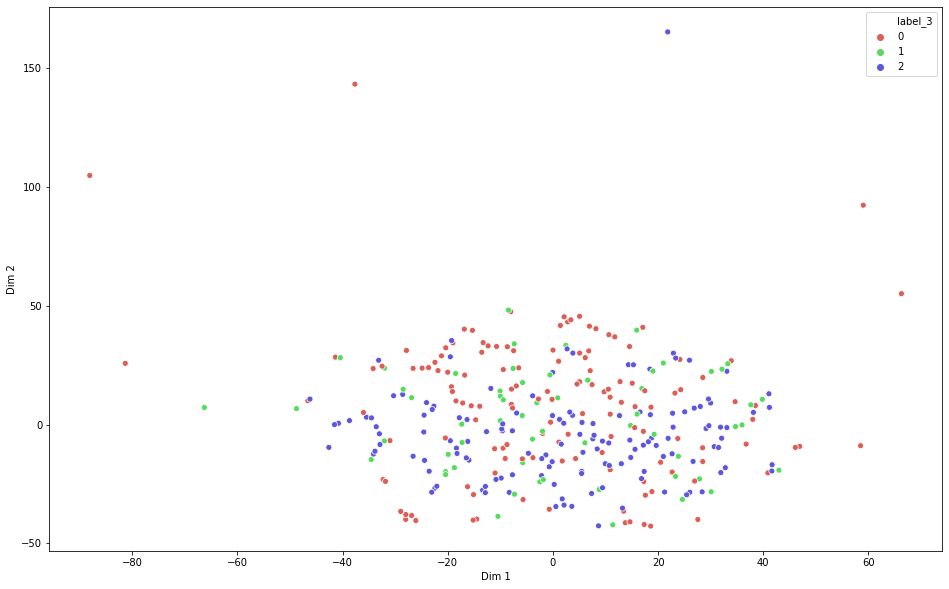

In [170]:
# On considère les deux dimensions les plus importantes
df_tfidf['Dim 1'] = tsne_results[:,0]
df_tfidf['Dim 2'] = tsne_results[:,1]

# On projette les données sur les deux axes, en colorant les points avec les labels
plt.figure(figsize=(16,10))
sns.scatterplot(
    x = "Dim 1", y = "Dim 2",
    hue = "label_3",
    palette = sns.color_palette("hls", 3),
    data = df_tfidf,
    legend = "full",
    alpha = 1.0
)